# SVM人臉辨識

## 載入相關套件

In [1]:
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

## 載入資料集

In [11]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


## 資料分割

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 特徵縮放

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 使用 PCA 萃取 150 個特徵

In [5]:
n_components = 150

t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", 
          whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"轉換耗時: {(time() - t0):.3f}s")

轉換耗時: 0.183s


## 模型訓練

In [6]:
from sklearn.svm import SVC

clf = SVC(kernel="rbf", class_weight="balanced")
clf.fit(X_train_pca, y_train)

SVC(class_weight='balanced')

## 模型評分

In [7]:
# 計算準確率
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_pca)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

76.74%


## 分類報告

In [8]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.53      0.69        17
     Colin Powell       0.84      0.75      0.79        36
  Donald Rumsfeld       0.95      0.62      0.75        29
    George W Bush       0.73      0.97      0.83       111
Gerhard Schroeder       0.75      0.48      0.59        25
      Hugo Chavez       0.75      0.50      0.60        12
       Tony Blair       0.69      0.64      0.67        28

         accuracy                           0.77       258
        macro avg       0.82      0.64      0.70       258
     weighted avg       0.79      0.77      0.76       258



## 混淆矩陣圖

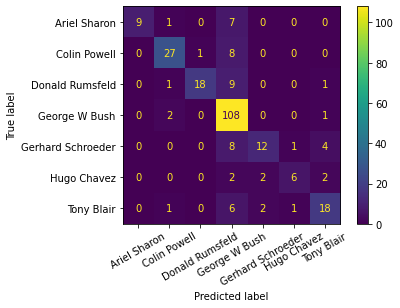

In [9]:
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, 
    xticks_rotation="30"
);

## 結合圖像與預測結果驗證

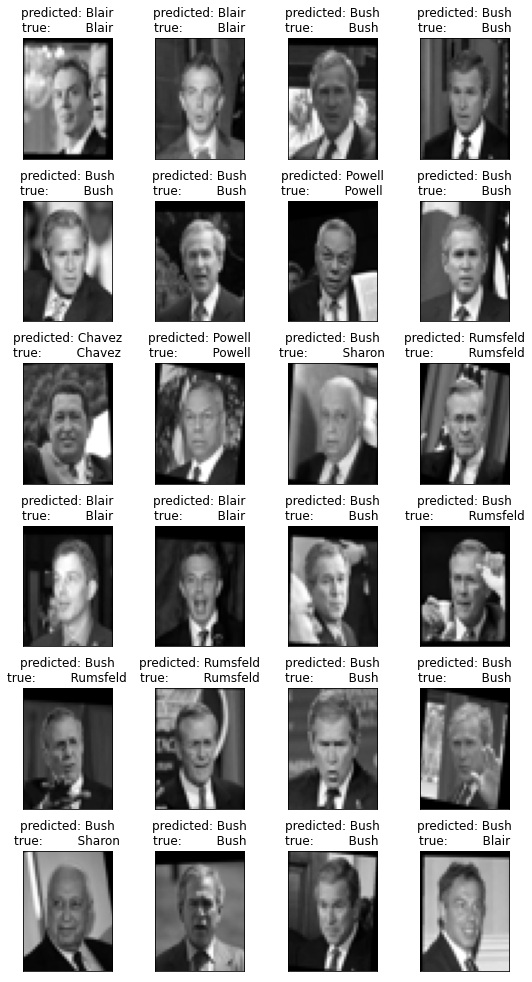

In [10]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return f"predicted: {pred_name}\ntrue:         {true_name}"


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w, n_row=6, n_col=4)        